# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                diferencia =  diferencia = Y_train[i] - prediction
                error = diferencia ** 2
                train_error_acum += error # Aquí se acumula el error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                weights_derivative = -2 * diferencia * self.sigmoid_derivative(prediction) * inputs
                bias_derivative = -2 * diferencia * self.sigmoid_derivative(prediction)
                self.weights = self.weights - learning_rate * weights_derivative
                self.bias = self.bias - learning_rate * bias_derivative

            # Calcular el error promedio por epoch
            train_error_acum /= X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction = self.predict(inputs)

                diferencia = Y_validation[i] - prediction
                error = diferencia ** 2
                val_error_acum += error # Aquí se acumula el error

            # Calcular el error promedio de validación por epoch
            val_error_acum /= X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)


            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()

In [4]:
# Datos de entrenamiento y validación para la puerta AND
N_samples = 5000
N_inputs = 2
train_size = 0.8
N_validation = int((1 - train_size) * N_samples)

X_train = np.random.randint(2, size=(N_samples, N_inputs))
Y_train = np.logical_and(X_train[:,0], X_train[:,1]).astype('uint8')

X_validation = np.random.randint(2, size=(N_validation, 2))
Y_validation = np.logical_and(X_validation[:,0], X_validation[:,1]).astype('uint8')

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])

X_data (first 5 samples):
[[0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]]
Y_data (first 5 samples):
[0 0 0 0 0]


In [5]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

In [6]:
# Comprobar predicción del modelo sin entrenar
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [1 0]
Probabilidad: 0.43208261341021353
Prediction: 0


In [7]:
# Obtenemos un overview de como funciona el modelo sin entrenar de forma aleatoria
predictions = []

## itera por cada muestra de validación y genera la matriz de confusion
for inputs in X_validation:
    prob = perceptron_and.predict(inputs)
    predictions.append(int(prob > th))

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[527 218]
 [254   0]]


epoch: 0 | train error: 0.03768844097071623 | val error: 0.006510906069061361
epoch: 10 | train error: 7.525879595111902e-05 | val error: 7.003601476669265e-05
epoch: 20 | train error: 1.9724960637587323e-05 | val error: 1.924841915486477e-05
epoch: 30 | train error: 8.898498560992482e-06 | val error: 8.827291098133725e-06
epoch: 40 | train error: 5.0412856640960485e-06 | val error: 5.04282879816586e-06
epoch: 50 | train error: 3.239780920795679e-06 | val error: 3.2571747595946103e-06
epoch: 60 | train error: 2.255861502494489e-06 | val error: 2.275662012842608e-06
epoch: 70 | train error: 1.6604446115947056e-06 | val error: 1.679089174338851e-06
epoch: 80 | train error: 1.273004497434953e-06 | val error: 1.2896507158190317e-06
epoch: 90 | train error: 1.006869551251082e-06 | val error: 1.021488173102393e-06


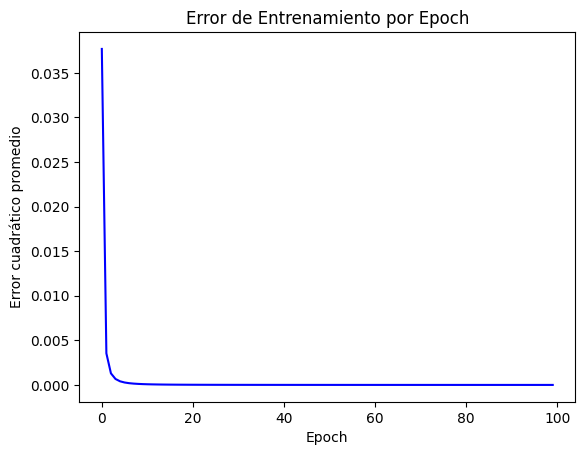

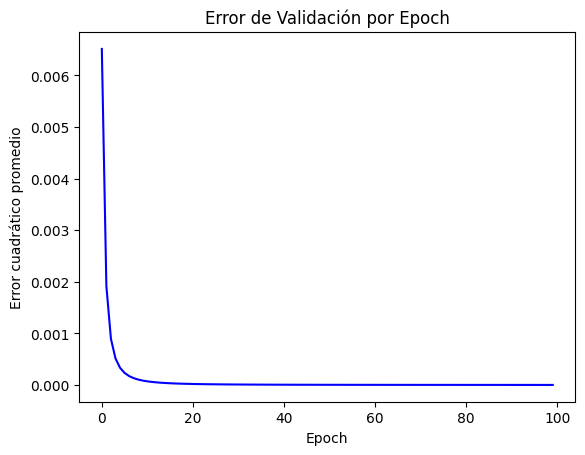

In [8]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [9]:
# Comprobar ahora la predicción del modelo entrenado en el set de validacion
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [1 0]
Probabilidad: 0.0008324378496827233
Prediction: 0


In [10]:
# Evaluamos cómo funciona el modelo en el set de validación

## itera por cada muestra de validación guardando las predicciones en una lista y genera la matriz de confusion
predictions = []

for inputs in X_validation:
    prob = perceptron_and.predict(inputs)
    predictions.append(int(prob > th))

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[745   0]
 [  0 254]]


In [11]:
# Evaluamos cómo funciona el modelo en el set de test

## Generar el set de test (de forma similar al de validación)
X_test = np.random.randint(2, size=(N_validation, 2))
Y_test = np.logical_and(X_test[:,0], X_test[:,1]).astype('uint8')
## itera por cada muestra de test guardando las predicciones en una lista y genera la matriz de confusion
predictions_test = []

# Iterar por cada muestra de test guardando las predicciones en una lista
for inputs in X_test:
    prob = perceptron_and.predict(inputs)
    predictions_test.append(int(prob > th))
## Calcula la matriz de confusión
conf_matrix_test = confusion_matrix(Y_test, predictions_test)

## Visualiza la matriz de confusión
print("Matriz de Confusión (Set de Test):")
print(conf_matrix_test)



Matriz de Confusión (Set de Test):
[[760   0]
 [  0 239]]
